# Assignment 1 - Kanak Agarwal

## Space Complexity

### Binary Search

n=16     steps=5   log2(n)=4.00 space=632
n=32     steps=6   log2(n)=5.00 space=1208
n=64     steps=7   log2(n)=6.00 space=2360
n=128    steps=8   log2(n)=7.00 space=4664
n=256    steps=9   log2(n)=8.00 space=9272
n=512    steps=10  log2(n)=9.00 space=18488
n=1024   steps=11  log2(n)=10.00 space=36920
n=2048   steps=12  log2(n)=11.00 space=73784
n=4096   steps=13  log2(n)=12.00 space=147512
n=8192   steps=14  log2(n)=13.00 space=294968
n=16384  steps=15  log2(n)=14.00 space=589880
n=32768  steps=16  log2(n)=15.00 space=1179704
n=65536  steps=17  log2(n)=16.00 space=2359352
n=131072 steps=18  log2(n)=17.00 space=4718648
n=262144 steps=19  log2(n)=18.00 space=9437240
n=524288 steps=20  log2(n)=19.00 space=18874424


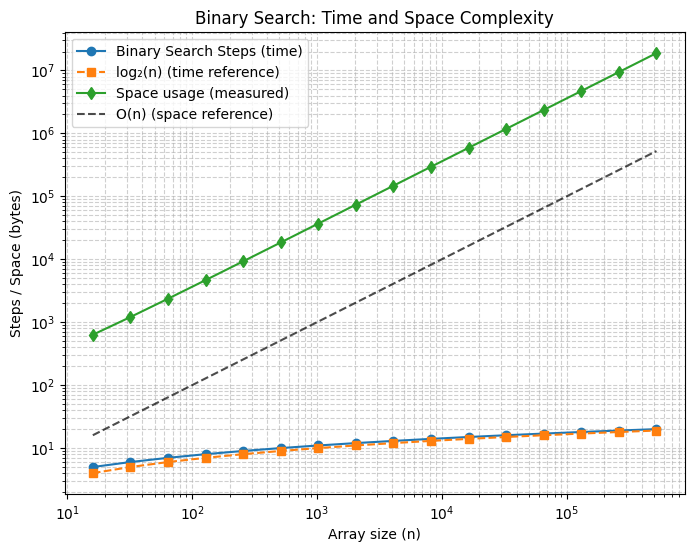

In [1]:
import math
import matplotlib.pyplot as plt
import sys

# 1️⃣ Binary Search Implementation
def binary_search(arr, target):
    low, high = 0, len(arr) - 1
    steps = 0

    while low <= high:
        steps += 1
        mid = (low + high) // 2

        if arr[mid] == target:
            return mid, steps
        elif arr[mid] < target:
            low = mid + 1
        else:
            high = mid - 1

    return -1, steps

# 2️⃣ Collect data for scaling
sizes = [2**k for k in range(4, 20)]  # sizes from 16 to 2^19 (~500k)
steps_list = []
log_values = []
space_list = []

for n in sizes:
    arr = list(range(n))
    target = arr[-1]  # worst-case scenario
    _, steps = binary_search(arr, target)
    
    steps_list.append(steps)
    log_values.append(math.log2(n))
    
    # measure space usage: list object + integers
    space_used = sys.getsizeof(arr) + sum(sys.getsizeof(x) for x in arr)
    space_list.append(space_used)
    
    print(f"n={n:<6} steps={steps:<3} log2(n)={math.log2(n):.2f} space={space_used}")

# 3️⃣ Plot results: steps and space together
plt.figure(figsize=(8, 6))

# Steps scaling
plt.loglog(sizes, steps_list, 'o-', label="Binary Search Steps (time)")
plt.loglog(sizes, log_values, 's--', label="log₂(n) (time reference)")

# Space scaling
plt.loglog(sizes, space_list, 'd-', label="Space usage (measured)")
plt.loglog(sizes, sizes, 'k--', alpha=0.7, label="O(n) (space reference)")

plt.xlabel("Array size (n)")
plt.ylabel("Steps / Space (bytes)")
plt.title("Binary Search: Time and Space Complexity")
plt.legend()
plt.grid(True, which="both", linestyle="--", alpha=0.6)
plt.show()


### Bubble Sort

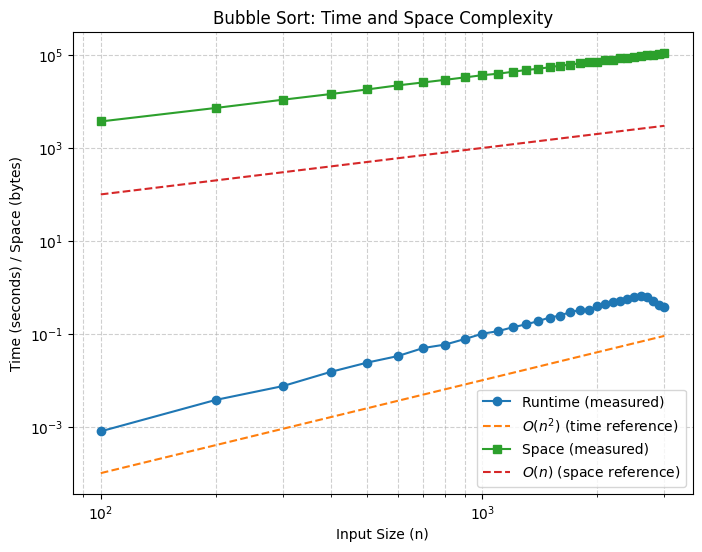

In [4]:
import time
import random
import matplotlib.pyplot as plt
import numpy as np
import sys

def bubble_sort(arr):
    n = len(arr)
    for i in range(n):
        for j in range(n - i - 1):
            if arr[j] > arr[j + 1]:
                arr[j], arr[j + 1] = arr[j + 1], arr[j]

# Measure time and space for different input sizes
input_sizes = list(range(100, 3100, 100))
times = []
space_list = []

for n in input_sizes:
    test_array = [random.randint(0, 1000) for _ in range(n)]
    
    # Measure runtime
    start = time.time()
    bubble_sort(test_array)
    end = time.time()
    times.append(end - start)
    
    # Measure space: list object + sum of integers
    space_used = sys.getsizeof(test_array) + sum(sys.getsizeof(x) for x in test_array)
    space_list.append(space_used)

# Plotting time + space together
plt.figure(figsize=(8,6))

# Runtime
plt.loglog(input_sizes, times, marker='o', label="Runtime (measured)")
plt.loglog(input_sizes, 1e-8*np.array(input_sizes)**2, linestyle='--', label=r"$O(n^2)$ (time reference)")

# Space
plt.loglog(input_sizes, space_list, marker='s', label="Space (measured)")
plt.loglog(input_sizes, input_sizes, linestyle='--', label=r"$O(n)$ (space reference)")

plt.title("Bubble Sort: Time and Space Complexity")
plt.xlabel("Input Size (n)")
plt.ylabel("Time (seconds) / Space (bytes)")
plt.legend()
plt.grid(True, which="both", linestyle="--", alpha=0.6)
plt.show()


### FFT

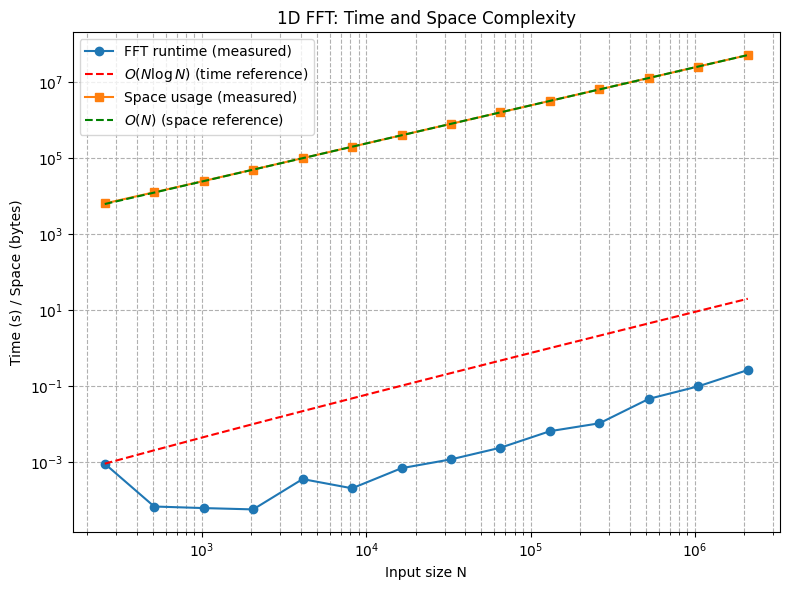

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import time
import sys

# Input sizes: powers of 2 from 2^8 to 2^20
sizes = 2 ** np.arange(8, 22)
times = []
space_list = []

# Measure FFT time and space for each size
for N in sizes:
    x = np.random.rand(N)
    
    # Measure runtime
    start = time.perf_counter()
    fft_result = np.fft.fft(x)
    end = time.perf_counter()
    times.append(end - start)
    
    # Measure space: input array + output array + small constants
    space_used = sys.getsizeof(x) + sys.getsizeof(fft_result)
    space_list.append(space_used)

# Plot results: runtime + space
plt.figure(figsize=(8, 6))

# Runtime
plt.loglog(sizes, times, 'o-', label="FFT runtime (measured)")
plt.loglog(sizes, times[0] * sizes * np.log2(sizes) / (sizes[0] * np.log2(sizes[0])),
           'r--', label=r"$O(N \log N)$ (time reference)")

# Space
plt.loglog(sizes, space_list, 's-', label="Space usage (measured)")
plt.loglog(sizes, sizes*sys.getsizeof(float()), 'g--', label=r"$O(N)$ (space reference)")

plt.xlabel("Input size N")
plt.ylabel("Time (s) / Space (bytes)")
plt.title("1D FFT: Time and Space Complexity")
plt.legend()
plt.grid(True, which="both", ls="--")
plt.tight_layout()
plt.show()


### Matrix Multiplication

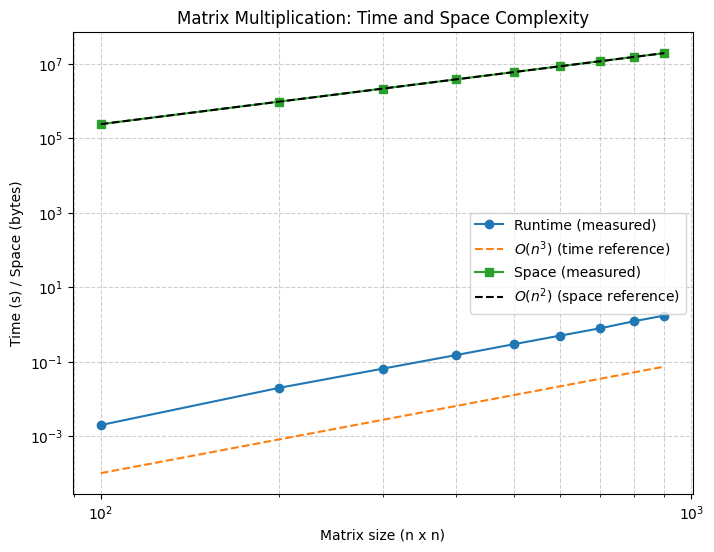

In [11]:
import numpy as np
import time
import matplotlib.pyplot as plt
import sys

# Matrix sizes to test
sizes = list(range(100, 1000, 100))
times = []
space_list = []

# Measure time and space for multiplying n x n matrices
for n in sizes:
    A = np.random.rand(n, n)
    B = np.random.rand(n, n)
    
    start = time.time()
    # Standard matrix multiplication
    C = np.dot(A, B)
    end = time.time()
    
    times.append(end - start)
    
    # Measure space: A + B + C
    space_used = sys.getsizeof(A) + sys.getsizeof(B) + sys.getsizeof(C)
    space_list.append(space_used)

# Plotting time + space together
plt.figure(figsize=(8,6))

# Runtime
plt.loglog(sizes, times, marker='o', label="Runtime (measured)")
plt.loglog(sizes, 1e-10*np.array(sizes)**3, linestyle='--', label=r"$O(n^3)$ (time reference)")

# Space
plt.loglog(sizes, space_list, marker='s', label="Space (measured)")
plt.loglog(sizes, np.array(sizes)**2 * sys.getsizeof(float()), 'k--', label=r"$O(n^2)$ (space reference)")

plt.title("Matrix Multiplication: Time and Space Complexity")
plt.xlabel("Matrix size (n x n)")
plt.ylabel("Time (s) / Space (bytes)")
plt.legend()
plt.grid(True, which="both", linestyle="--", alpha=0.6)
plt.show()


### Subset Sum

n=5  time=0.00002 sec  space=424 bytes
n=6  time=0.00003 sec  space=488 bytes
n=7  time=0.00005 sec  space=568 bytes
n=8  time=0.00010 sec  space=632 bytes
n=9  time=0.00019 sec  space=712 bytes
n=10  time=0.00038 sec  space=776 bytes
n=11  time=0.00075 sec  space=856 bytes
n=12  time=0.00175 sec  space=920 bytes
n=13  time=0.00329 sec  space=1000 bytes
n=14  time=0.00626 sec  space=1064 bytes
n=15  time=0.01195 sec  space=1144 bytes
n=16  time=0.02335 sec  space=1208 bytes
n=17  time=0.04506 sec  space=1288 bytes
n=18  time=0.08782 sec  space=1352 bytes
n=19  time=0.17690 sec  space=1432 bytes
n=20  time=0.34991 sec  space=1496 bytes
n=21  time=0.68782 sec  space=1576 bytes
n=22  time=1.35659 sec  space=1640 bytes
n=23  time=2.70732 sec  space=1720 bytes
n=24  time=3.85681 sec  space=1784 bytes


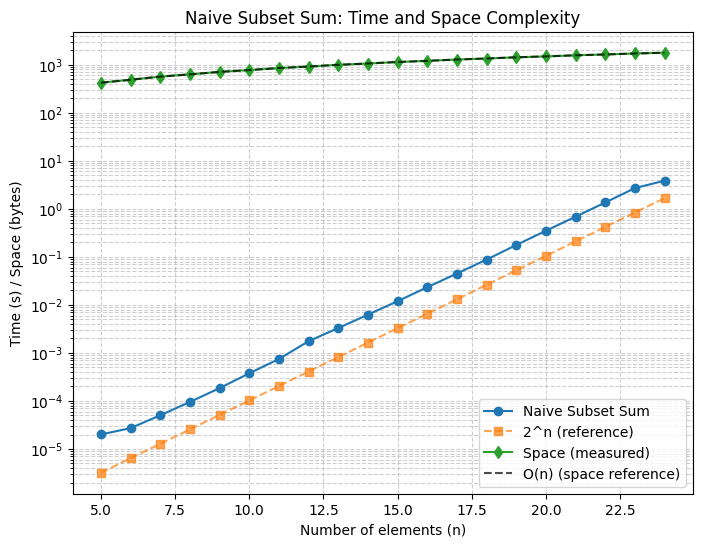

In [13]:
import time
import matplotlib.pyplot as plt
import sys

# 1️⃣ Naive recursive subset sum
def subset_sum(nums, target, i=0):
    # Base cases
    if target == 0:
        return True
    if i >= len(nums) or target < 0:
        return False

    # Recursive: include or exclude nums[i]
    include = subset_sum(nums, target - nums[i], i + 1)
    exclude = subset_sum(nums, target, i + 1)
    return include or exclude

# 2️⃣ Measure scaling
sizes = list(range(5, 25))  # number of elements (keep small to avoid huge runtimes)
times = []
space_list = []

for n in sizes:
    nums = list(range(1, n + 1))  # simple sequence
    target = sum(nums) // 2       # typical hard target

    # Measure runtime
    start = time.time()
    subset_sum(nums, target)
    end = time.time()
    elapsed = end - start
    times.append(elapsed)

    # Measure space: list + recursion stack
    # Worst-case recursion depth = n
    space_used = sys.getsizeof(nums) + n * 64  # assume ~64 bytes per call frame
    space_list.append(space_used)

    print(f"n={n}  time={elapsed:.5f} sec  space={space_used} bytes")

# 3️⃣ Plot results
plt.figure(figsize=(8, 6))

# Runtime
plt.plot(sizes, times, 'o-', label="Naive Subset Sum")
plt.plot(sizes, [1e-7*2**n for n in sizes], 's--', label="2^n (reference)", alpha=0.7)
plt.yscale("log")  # exponential growth

# Space
plt.plot(sizes, space_list, 'd-', label="Space (measured)")
plt.plot(sizes, [sys.getsizeof(list(range(n))) + n*64 for n in sizes], 'k--', label="O(n) (space reference)", alpha=0.7)

plt.xlabel("Number of elements (n)")
plt.ylabel("Time (s) / Space (bytes)")
plt.title("Naive Subset Sum: Time and Space Complexity")
plt.grid(True, which="both", linestyle="--", alpha=0.6)
plt.legend()
plt.show()


## k-nary Search

### Tenary Search

168 168
7547 7547
80723 80723
812722 812722
7992087 7992087
95688696 95688696


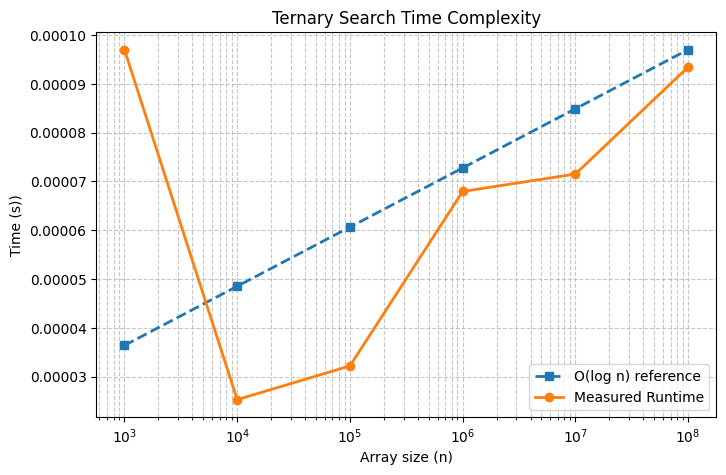

In [2]:
import time
import random
import matplotlib.pyplot as plt
import math

def ternary_search(arr, target, left, right):
    if right >= left:
        # Divide the array into three parts
        mid1 = left + (right - left) // 3
        mid2 = right - (right - left) // 3

        # Check if the target is at any mid
        if arr[mid1] == target:
            return mid1
        if arr[mid2] == target:
            return mid2

        # If target lies in the first part
        if target < arr[mid1]:
            return ternary_search(arr, target, left, mid1 - 1)

        # If target lies in the third part
        elif target > arr[mid2]:
            return ternary_search(arr, target, mid2 + 1, right)

        # Else it lies in the middle part
        else:
            return ternary_search(arr, target, mid1 + 1, mid2 - 1)

    return -1  # Target not found

sizes = [10**3, 10**4, 10**5, 10**6, 10**7, 10**8]  # array sizes
times = []

for n in sizes:
    arr = list(range(n))  # sorted array
    target = random.choice(arr)  # pick a random target

    start = time.time()
    index = ternary_search(arr, target, 0, n - 1)
    print(index,target)
    end = time.time()

    times.append(end - start)

log_n = [math.log(n) for n in sizes] # ideal scaling
scale = max(times) / max(log_n) # scale factor
log_n_scaled = [x * scale for x in log_n] # Normalize the log(n) values
 
plt.figure(figsize=(8, 5))
plt.plot(sizes, log_n_scaled, marker='s', linestyle='--', linewidth=2, label="O(log n) reference")
plt.plot(sizes, times, marker='o', linewidth=2, label="Measured Runtime")
plt.xscale("log")
plt.xlabel("Array size (n)")
plt.ylabel("Time (s))")
plt.title("Ternary Search Time Complexity")
plt.grid(True, which="both", linestyle="--", alpha=0.7)
plt.legend()
plt.show()

573 573
7756 7756
10316 10316
928597 928597
119909 119909
59839094 59839094


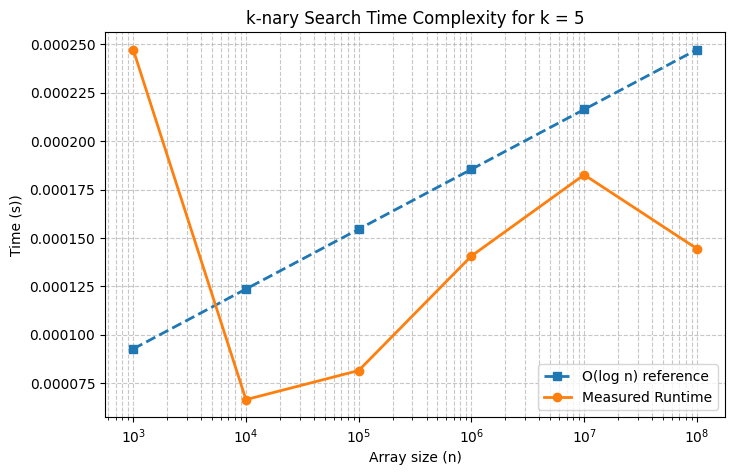

In [23]:
import time
import random
import matplotlib.pyplot as plt
import math

def knary_search(arr, target, left, right,k):
    if right >= left:
        # Divide the array into k parts
        segment = (right - left) // k
        mids = [left + i * segment for i in range(1, k)] # k-1 midpoints

        # Check all midpoints
        for mid in mids:
            if arr[mid] == target:
                return mid

        # Find the segment where target lies
        if target < arr[mids[0]]:
            return knary_search(arr, target, left, mids[0]-1, k)
        for i in range(1, len(mids)):
            if target < arr[mids[i]]:
                return knary_search(arr, target, mids[i-1]+1, mids[i]-1, k)

        # Target in last segment
        return knary_search(arr, target, mids[-1]+1, right, k)

    return -1  # Target not found

sizes = [10**3, 10**4, 10**5, 10**6, 10**7, 10**8]  # array sizes
times = []

for n in sizes:
    arr = list(range(n))  # sorted array
    target = random.choice(arr)  # pick a random target

    start = time.time()
    index = knary_search(arr, target, 0, n - 1, 5)
    print(index,target)
    end = time.time()

    times.append(end - start)

log_n = [math.log(n) for n in sizes]
scale = max(times) / max(log_n)
log_n_scaled = [x * scale for x in log_n]
 
plt.figure(figsize=(8, 5))
plt.plot(sizes, log_n_scaled, marker='s', linestyle='--', linewidth=2, label="O(log n) reference")
plt.plot(sizes, times, marker='o', linewidth=2, label="Measured Runtime")
plt.xscale("log")
plt.xlabel("Array size (n)")
plt.ylabel("Time (s))")
plt.title("k-nary Search Time Complexity for k = 5")
plt.grid(True, which="both", linestyle="--", alpha=0.7)
plt.legend()
plt.show()

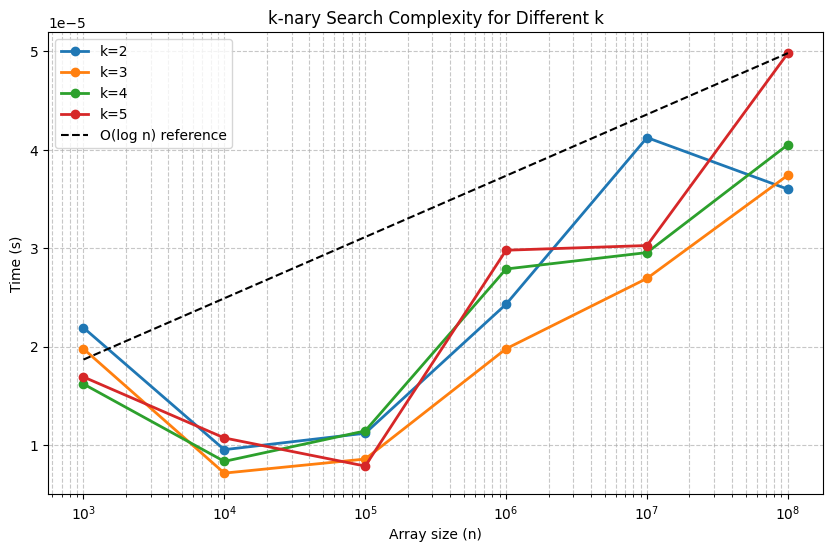

In [15]:
import time
import random
import matplotlib.pyplot as plt
import math

def knary_search(arr, target, left, right,k):
    if right >= left:
        # Divide the array into k parts
        segment = (right - left) // k
        mids = [left + i * segment for i in range(1, k)] # k-1 midpoints

        # Check all midpoints
        for mid in mids:
            if arr[mid] == target:
                return mid

        # Find the segment where target lies
        if target < arr[mids[0]]:
            return knary_search(arr, target, left, mids[0]-1, k)
        for i in range(1, len(mids)):
            if target < arr[mids[i]]:
                return knary_search(arr, target, mids[i-1]+1, mids[i]-1, k)

        # Target in last segment
        return knary_search(arr, target, mids[-1]+1, right, k)

    return -1  # Target not found

# Benchmark
sizes = [10**3, 10**4, 10**5, 10**6, 10**7, 10**8]
ks = [2, 3, 4, 5]  # different k values
results = {}

for k in ks:
    times = []
    for n in sizes:
        arr = list(range(n))
        target = random.choice(arr)
        start = time.time()
        knary_search(arr, target, 0, n-1, k)
        end = time.time()
        times.append(end - start)
    results[k] = times

# Plotting
plt.figure(figsize=(10,6))
for k in ks:
    plt.plot(sizes, results[k], marker='o', linewidth=2, label=f"k={k}")

# Plot O(log n) reference
log_n = [math.log(n) for n in sizes]
scale = max(max(results[k]) for k in ks) / max(log_n)
log_n_scaled = [x*scale for x in log_n]
plt.plot(sizes, log_n_scaled, 'k--', label='O(log n) reference')

plt.xscale('log')
plt.xlabel("Array size (n)")
plt.ylabel("Time (s)")
plt.title("k-nary Search Complexity for Different k")
plt.grid(True, which='both', linestyle='--', alpha=0.7)
plt.legend()
plt.show()

## Perfect Square Dissection

Order: 3, Partition: [80, 48, 36], Time: 0.0037 s, Memory: 360 bytes
Order: 5, Partition: [99, 13, 5, 2, 1], Time: 0.0000 s, Memory: 904 bytes
Order: 6, Partition: [99, 13, 4, 3, 2, 1], Time: 0.0000 s, Memory: 904 bytes
Order: 8, Partition: [98, 15, 9, 6, 5, 4, 3, 2], Time: 0.0008 s, Memory: 904 bytes
Order: 10, Partition: [97, 16, 12, 10, 6, 5, 4, 3, 2, 1], Time: 0.0054 s, Memory: 968 bytes
Order: 12, Partition: [96, 16, 12, 10, 9, 8, 7, 6, 5, 4, 3, 2], Time: 0.0307 s, Memory: 968 bytes
Order: 14, Partition: [95, 16, 13, 12, 11, 9, 8, 7, 6, 5, 4, 3, 2, 1], Time: 0.1059 s, Memory: 968 bytes
Order: 16, Partition: [92, 18, 17, 15, 13, 12, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1], Time: 1.3970 s, Memory: 1000 bytes
Order: 18, Partition: [89, 22, 18, 16, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1], Time: 9.2383 s, Memory: 1032 bytes
Order: 20, Partition: [84, 24, 22, 18, 17, 16, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1], Time: 117.1639 s, Memory: 2536 bytes


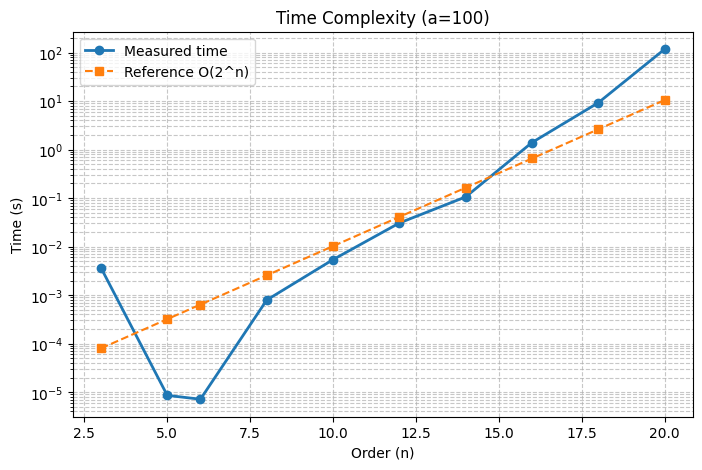

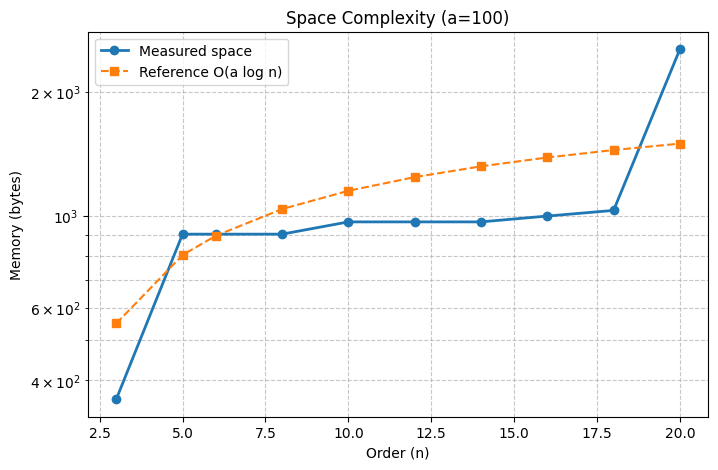

In [8]:
import math
import time
import sys
import matplotlib.pyplot as plt

def perfect_square_partition(order, a):
    solution = []
    used = set()
    
    def backtrack(remaining_area, remaining_count, max_side):
        if remaining_count == 0:
            return remaining_area == 0
        for s in range(min(max_side, int(math.isqrt(remaining_area))), 0, -1):
            if s not in used and s < a:
                solution.append(s)
                used.add(s)
                if backtrack(remaining_area - s*s, remaining_count - 1, s-1):
                    return True
                solution.pop()
                used.remove(s)
        return False
    
    if backtrack(a*a, order, a-1):
        return solution
    else:
        return None

orders = [3, 5, 6, 8, 10, 12, 14, 16, 18, 20]
a = 100
times = []
space_usage = []

for order in orders:
    start_time = time.time()
    partition = perfect_square_partition(order, a)
    end_time = time.time()
    elapsed = end_time - start_time
    times.append(elapsed)
    
    # Approximate memory used by solution list + used set
    mem_solution = sys.getsizeof(partition) if partition else 0 # Memory of solution
    mem_used = sys.getsizeof(set(partition)) if partition else 0 # Memory of used
    total_mem = mem_solution + mem_used + sys.getsizeof(order) + sys.getsizeof(a)
    space_usage.append(total_mem)
    
    print(f"Order: {order}, Partition: {partition}, Time: {elapsed:.4f} s, Memory: {total_mem} bytes")

# Time plot with log scale
plt.figure(figsize=(8,5))
plt.plot(orders, times, marker='o', linestyle='-', linewidth=2, label="Measured time")
plt.plot(orders, [1e-5*(2**o) for o in orders], marker='s', linestyle='--', label="Reference O(2^n)")
plt.yscale("log")
plt.xlabel("Order (n)")
plt.ylabel("Time (s)")
plt.title(f"Time Complexity (a={a})")
plt.grid(True, which="both", linestyle="--", alpha=0.7)
plt.legend()
plt.show()

# Space plot with log scale
plt.figure(figsize=(8,5))
plt.plot(orders, space_usage, marker='o', linestyle='-', linewidth=2, label="Measured space")
plt.plot(orders, [5*(a)*math.log(o) for o in orders], marker='s', linestyle='--', label="Reference O(a log n)")
plt.yscale("log")
plt.xlabel("Order (n)")
plt.ylabel("Memory (bytes)")
plt.title(f"Space Complexity (a={a})")
plt.grid(True, which="both", linestyle="--", alpha=0.7)
plt.legend()
plt.show()